### 2.1.1 核函数实现

In [3]:
import numpy as np

In [4]:
def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
    return np.sum(x * z, axis=0)
    
def polynomial_kernel(x: np.ndarray, z: np.ndarray, c: int, p: int) -> np.ndarray:
    return (np.sum(x * z, axis=0) + c) ** p

def gaussian_kernel(x: np.ndarray, z: np.ndarray, l: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return np.exp(-temp / (l ** 2))

def periodic_kernel(x: np.ndarray, z: np.ndarray, l: float, p: float) -> np.ndarray:
    temp = np.sum(np.sin(np.pi * (x-z) / p), axis=0)
    return np.exp(-temp ** 2 / (2 * l ** 2))

def RBF_kernel(x: np.ndarray, z: np.ndarray, a: float, b: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return a * np.exp(-b * temp)

### 2.1.1 核函数图像绘制$k(x,0), k(x,1)$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
    return np.sum(x * z, axis=0)
    
def polynomial_kernel(x: np.ndarray, z: np.ndarray, c: float, p: float) -> np.ndarray:
    return (np.sum(x * z, axis=0) + c) ** p

def gaussian_kernel(x: np.ndarray, z: np.ndarray, l: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return np.exp(-temp / (l ** 2))

def periodic_kernel(x: np.ndarray, z: np.ndarray, l: float, p: float) -> np.ndarray:
    temp = np.sum(np.sin(np.pi * (x-z) / p), axis=0)
    return np.exp(-temp ** 2 / (2 * l ** 2))

def RBF_kernel(x: np.ndarray, z: np.ndarray, a: float, b: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return a * np.exp(-b * temp)

In [7]:
def linear_kernel_show(x, z_0, z_1) -> None:
    plt.plot(x.reshape(-1), linear_kernel(x, z_0), label='k(x,0)')
    plt.plot(x.reshape(-1), linear_kernel(x, z_1), label='k(x,1)')
    plt.title('Linear Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

def polynomial_kernel_show(x, z_0, z_1, c, p) -> None:
    for _p in p:
        plt.plot(x.reshape(-1), polynomial_kernel(x, z_0, c, _p).reshape(-1), label=f'k(x,0) c={c}, p={_p}')
        plt.plot(x.reshape(-1), polynomial_kernel(x, z_1, c, _p).reshape(-1), label=f'k(x,1) c={c}, p={_p}')
    plt.title('Polynomial Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

def gaussian_kernel_show(x, z_0, z_1, l) -> None:
    for _l in l:
        plt.plot(x.reshape(-1), gaussian_kernel(x, z_0, _l), label=f"k(k,0) l={_l}")
        plt.plot(x.reshape(-1), gaussian_kernel(x, z_1, _l), label=f"k(k,1) l={_l}")
    plt.title("Gaussian Kernel")
    plt.xlabel("x")
    plt.ylabel("k(x,z)")
    plt.legend()
    plt.show()

def periodic_kernel_show(x, z_0, z_1, p, l) -> None:
    for (_p, _l) in zip(p, l):
        # plt.plot(x.reshape(-1), periodic_kernel(x, z_0, _p, _l), label=f'k(x, 0) p={_p}, l={_l}')
        plt.plot(x.reshape(-1), periodic_kernel(x, z_1, _p, _l), label=f'k(x, 1) p={_p}, l={_l}')
    plt.title('Periodic Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x, z)')
    plt.legend()
    plt.show()

def RBF_kernel_show(x, z_0, z_1, a, b) -> None:
    for (_a, _b) in zip (a, b):
        plt.plot(x.reshape(-1), RBF_kernel(x, z_0, _a, _b), label=f'k(x,0) a={_a}, b={_b}')
        plt.plot(x.reshape(-1), RBF_kernel(x, z_1, _a, _b), label=f'k(x,1) a={_a}, b={_b}')
    plt.title('RBF Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

In [8]:
x = np.linspace(-6, 6, 100).reshape(1, -1)
z_0 = np.zeros(100).reshape(1, -1)
z_1 = np.ones(100).reshape(1, -1)

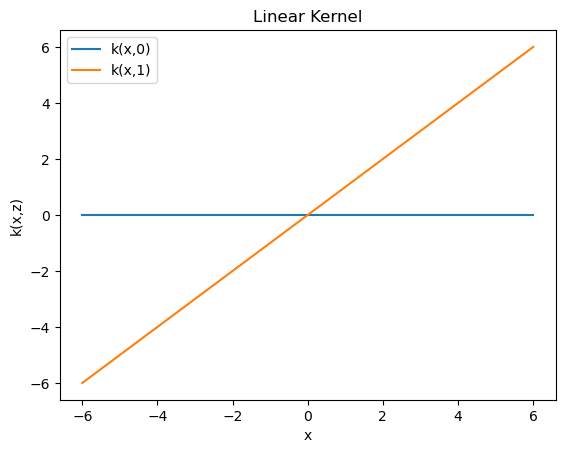

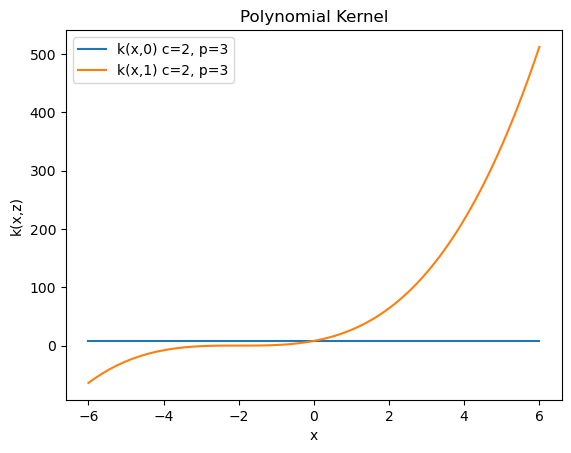

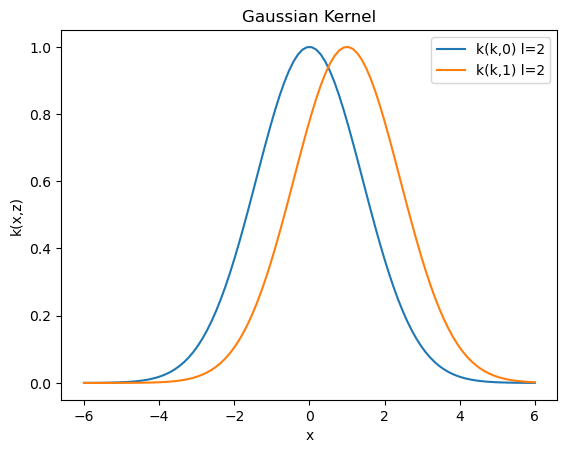

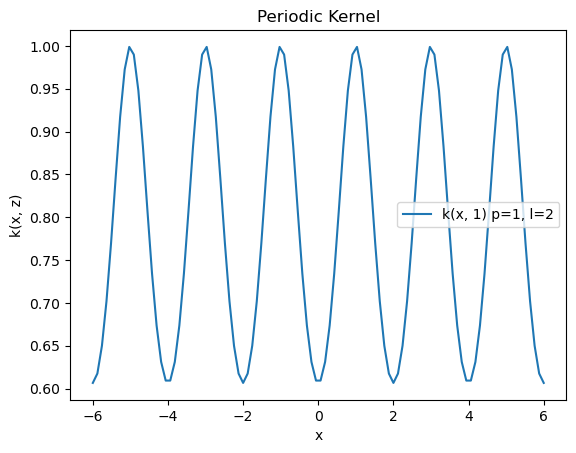

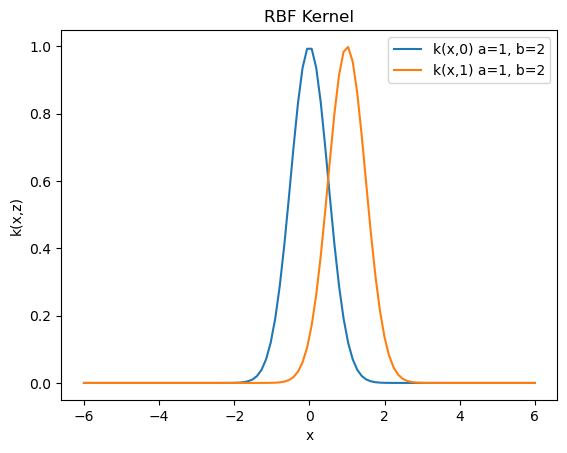

In [9]:
linear_kernel_show(x, z_0, z_1)
polynomial_kernel_show(x, z_0, z_1, c=2, p=[3])
gaussian_kernel_show(x, z_0, z_1, l=[2])
periodic_kernel_show(x, z_0, z_1, p=[1],l=[2])
RBF_kernel_show(x, z_0, z_1, a=[1], b=[2])

### 2.1.3 核函数参数分析$(l, p, \alpha, \gamma)$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
    return np.sum(x * z, axis=0)
    
def polynomial_kernel(x: np.ndarray, z: np.ndarray, c: float, p: float) -> np.ndarray:
    return (np.sum(x * z, axis=0) + c) ** p

def gaussian_kernel(x: np.ndarray, z: np.ndarray, l: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return np.exp(-temp / (l ** 2))

def periodic_kernel(x: np.ndarray, z: np.ndarray, l: float, p: float) -> np.ndarray:
    temp = np.sum(np.sin(np.pi * (x-z) / p), axis=0)
    return np.exp(-temp ** 2 / (2 * l ** 2))

def RBF_kernel(x: np.ndarray, z: np.ndarray, a: float, b: float) -> np.ndarray:
    temp = np.sum((x-z)**2, axis=0)
    return a * np.exp(-b * temp)

In [12]:
def linear_kernel_show(x, z_0, z_1) -> None:
    plt.plot(x.reshape(-1), linear_kernel(x, z_0), label='k(x,0)')
    plt.plot(x.reshape(-1), linear_kernel(x, z_1), label='k(x,1)')
    plt.title('Linear Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

def polynomial_kernel_show(x, z_0, z_1, c, p) -> None:
    for _p in p:
        plt.plot(x.reshape(-1), polynomial_kernel(x, z_0, c, _p).reshape(-1), label=f'k(x,0) c={c}, p={_p}')
        plt.plot(x.reshape(-1), polynomial_kernel(x, z_1, c, _p).reshape(-1), label=f'k(x,1) c={c}, p={_p}')
    plt.title('Polynomial Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

def gaussian_kernel_show(x, z_0, z_1, l) -> None:
    for _l in l:
        plt.plot(x.reshape(-1), gaussian_kernel(x, z_0, _l), label=f"k(k,0) l={_l}")
        plt.plot(x.reshape(-1), gaussian_kernel(x, z_1, _l), label=f"k(k,1) l={_l}")
    plt.title("Gaussian Kernel")
    plt.xlabel("x")
    plt.ylabel("k(x,z)")
    plt.legend()
    plt.show()

def periodic_kernel_show(x, z_0, z_1, p, l) -> None:
    for (_p, _l) in zip(p, l):
        # plt.plot(x.reshape(-1), periodic_kernel(x, z_0, _p, _l), label=f'k(x, 0) p={_p}, l={_l}')
        plt.plot(x.reshape(-1), periodic_kernel(x, z_1, _p, _l), label=f'k(x, 1) p={_p}, l={_l}')
    plt.title('Periodic Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x, z)')
    plt.legend()
    plt.show()

def RBF_kernel_show(x, z_0, z_1, a, b) -> None:
    for (_a, _b) in zip (a, b):
        plt.plot(x.reshape(-1), RBF_kernel(x, z_0, _a, _b), label=f'k(x,0) a={_a}, b={_b}')
        plt.plot(x.reshape(-1), RBF_kernel(x, z_1, _a, _b), label=f'k(x,1) a={_a}, b={_b}')
    plt.title('RBF Kernel')
    plt.xlabel('x')
    plt.ylabel('k(x,z)')
    plt.legend()
    plt.show()

In [13]:
x = np.linspace(-6, 6, 100).reshape(1, -1)
z_0 = np.zeros(100).reshape(1, -1)
z_1 = np.ones(100).reshape(1, -1)

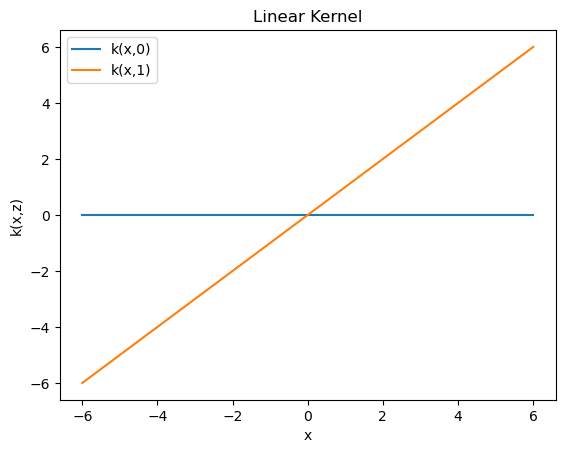

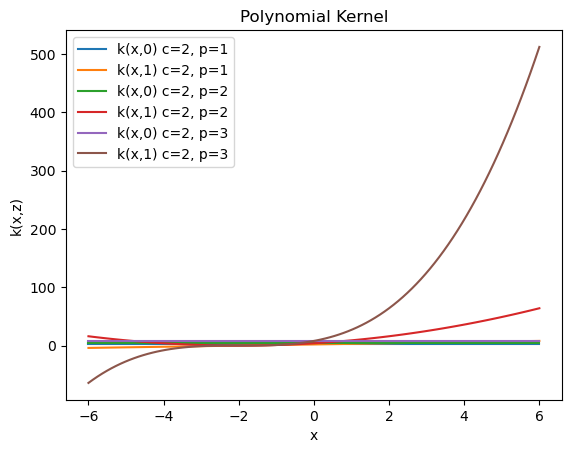

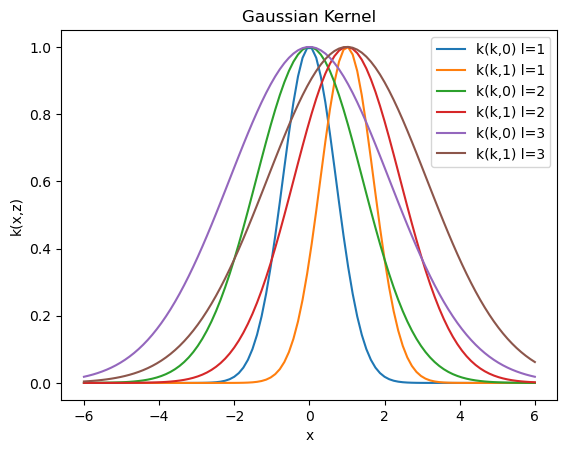

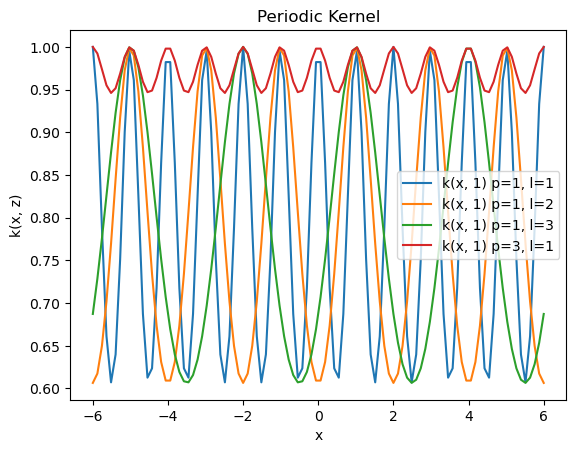

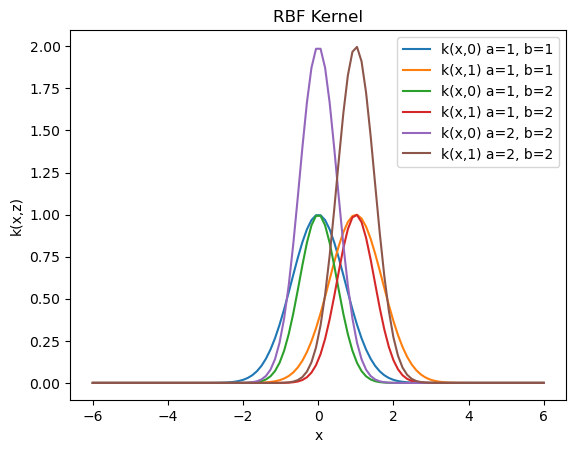

In [14]:
linear_kernel_show(x, z_0, z_1)
polynomial_kernel_show(x, z_0, z_1, c=2, p=[1,2,3])
gaussian_kernel_show(x, z_0, z_1, l=[1,2,3])
periodic_kernel_show(x, z_0, z_1, p=[1,1,1,3],l=[1,2,3,1])
RBF_kernel_show(x, z_0, z_1, a=[1,1,2], b=[1,2,2])

### 2.2.1 KLR数据集可视化及Kernel Ridge RiRegression

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [16]:
train_data = np.loadtxt("./KLR-datasets/data_train.csv", delimiter=",", skiprows=1, dtype=np.float64)
valid_data = np.loadtxt("./KLR-datasets/data_valid.csv", delimiter=",", skiprows=1, dtype=np.float64)
test_data = np.loadtxt("./KLR-datasets/data_test.csv", delimiter=",", skiprows=1, dtype=np.float64)

In [17]:
x_train_data = train_data[:, 0]
y_train_data = train_data[:, 1]
x_valid_data = valid_data[:, 0]
y_valid_data = valid_data[:, 1]
x_test_data = test_data[:, 0]
y_test_data = test_data[:, 1]
print(x_train_data.shape)
print(y_train_data.shape)

(2190,)
(2190,)


In [18]:
class KernelType(Enum):
    linear = "liner"
    polynomial = "polynomial"
    gaussian = "gaussian"
    periodic = "periodic"

In [19]:
class RidgeRegressor:
    def __init__(self, kernel_type, x_train_data=x_train_data, y_train_data=y_train_data, sigma=1.0, lamuda=1.0) -> None:
        self.kernel_type = kernel_type
        self.sigma = sigma
        self.lamuda = lamuda
        self.x_train_data = x_train_data
        self.y_train_data = y_train_data
        self.c = None
        self.p = None
        self.l = None

    def fit(self):
        if self.kernel_type == KernelType.linear:
            linear_kernel_res = self.linear_kernel(self.x_train_data, self.x_train_data)
            return np.linalg.inv(self.sigma ** 2 * self.lamuda * np.eye(linear_kernel_res.shape[0]) + linear_kernel_res) @ self.y_train_data
        elif self.kernel_type == KernelType.polynomial:
            polynomial_kernel_res = self.polynomial_kernel(self.x_train_data, self.x_train_data)
            return np.linalg.inv(self.sigma ** 2 * self.lamuda * np.eye(polynomial_kernel_res.shape[0]) + polynomial_kernel_res) @ self.y_train_data
        elif self.kernel_type == KernelType.gaussian:
            gaussian_kernel_res = self.gaussian_kernel(self.x_train_data, self.x_train_data)
            return np.linalg.inv(self.sigma ** 2 * self.lamuda * np.eye(gaussian_kernel_res.shape[0]) + gaussian_kernel_res) @ self.y_train_data
        elif self.kernel_type == KernelType.periodic:
            periodic_kernel_res = self.periodic_kernel(self.x_train_data, self.x_train_data)
            return np.linalg.inv(self.sigma ** 2 * self.lamuda * np.eye(periodic_kernel_res.shape[0]) + periodic_kernel_res) @ self.y_train_data
        
        
    def predict(self, x_test_data, fit):
        if self.kernel_type == KernelType.linear:
            linear_kernel_res = self.linear_kernel(x_test_data, self.x_train_data)
            return linear_kernel_res @ fit
        elif self.kernel_type == KernelType.polynomial:
            polynomial_kernel_res = self.polynomial_kernel(x_test_data, self.x_train_data)
            return polynomial_kernel_res @ fit
        elif self.kernel_type == KernelType.gaussian:
            gaussian_kernel_res = self.gaussian_kernel(x_test_data, self.x_train_data)
            return gaussian_kernel_res @ fit
        elif self.kernel_type == KernelType.periodic:
            periodic_kernel_res = self.periodic_kernel(x_test_data, self.x_train_data)
            return periodic_kernel_res @ fit


    def set_params(self, sigma=0.1, lamuda=0.1, c=1.0, p=1.0, l=1.0):
        self.sigma = sigma
        self.lamuda =lamuda
        self.c = c
        self.p = p
        self.l = l

    def linear_kernel(self, x, y):
        x = x.reshape(1, -1)
        y = y.reshape(1, -1)
        return np.dot(x.T, y)
    
    def polynomial_kernel(self, x, y):
        x = x.reshape(1, -1)
        y = y.reshape(1, -1)
        return (np.dot(x.T, y) + self.c) ** self.p
    
    def gaussian_kernel(self, x, y):
        k = np.zeros((x.shape[0], y.shape[0]))
        for i in range(x.shape[0]):
            for j in range(y.shape[0]):
                k[i, j] = np.exp(-np.sum((x[i] - y[j]) ** 2) / (2 * self.l ** 2))
        return k
    
    def periodic_kernel(self, x, y):
        x = x.reshape(-1, 1)
        y = y.reshape(1, -1)
        return np.exp(-np.square(np.sin((np.pi / self.p) * (x - y))) / (2 * (self.l ** 2)))
    
    def show_data(self, x_pred, y_pred, x_train_data=x_train_data, y_train_data=y_train_data, x_test_data=x_test_data, y_test_data=y_test_data, x_valid_data=x_valid_data, y_valid_data=y_valid_data):
        plt.figure()
        plt.scatter(x_train_data, y_train_data, label="Train Data")
        plt.scatter(x_valid_data, y_valid_data, label="Validation Data")
        plt.scatter(x_test_data, y_test_data, label="Test Data")
        plt.plot(x_pred, y_pred, color='red', label="Prediction Result")
        plt.xlim(-4, 6)
        plt.ylim(-5, 30)
        plt.axvline(x=2, color='red', linestyle='--')
        plt.axvline(x=4, color='red', linestyle='--')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f"Param: sigma={self.sigma}, lamuda={self.lamuda}")
        plt.legend()
        plt.show()

    @staticmethod
    def show_MSE(mse, sigma, lamuda, kernel_type):
        plt.imshow(mse, cmap='gray', origin='lower')
        plt.colorbar()
        plt.xticks(range(len(sigma)), sigma)
        plt.yticks(range(len(lamuda)), lamuda)
        plt.xlabel('sigma')
        plt.ylabel('lamuda')
        min_index = np.unravel_index(np.argmin(mse), mse.shape)
        print(min_index)
        if kernel_type == KernelType.linear:
            plt.title = f"MSE\n Hyperparameterlmpact Comparison Param:\n Best sigma={sigma[min_index[1]]},lamuda={lamuda[min_index[0]]}"

In [20]:
# sigma = [0.01, 0.10, 1.00, 10.00,100.00]
# lamuda = [10000.00, 1000.00, 100.00, 10.00, 1.00]
# mse = np.zeros((len(sigma), len(lamuda)))

# for i in range(len(sigma)):
#     for j in range(len(lamuda)):
#         linear_ridge_regression = RidgeRegressor(kernel_type=KernelType.linear)
#         linear_ridge_regression.set_params(sigma=sigma[i], lamuda=lamuda[j])
#         fit = linear_ridge_regression.fit()
#         x_test = x_test_data.reshape(-1, 1)
#         y_true = y_test_data
#         y_pred = linear_ridge_regression.predict(x_test, fit)
#         mse[i][j] = np.mean((y_true.reshape(-1, 1) - y_pred.reshape(1, -1)) ** 2)
# RidgeRegressor.show_MSE(mse, sigma, lamuda, KernelType.linear)

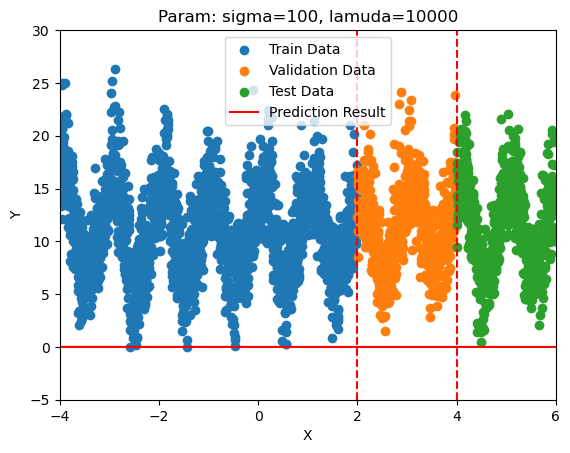

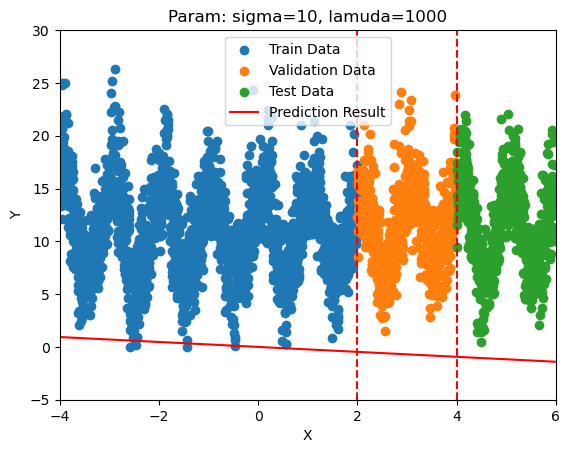

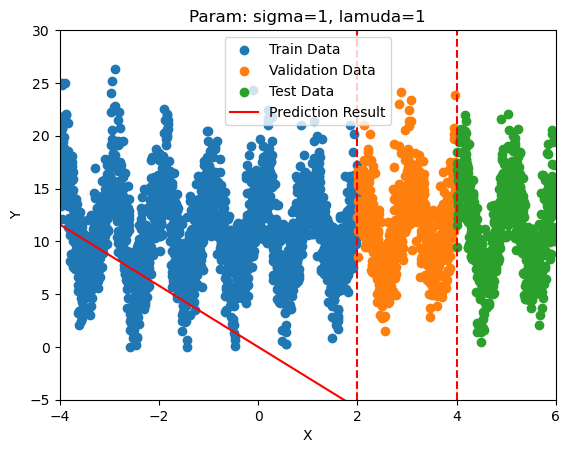

In [21]:
linear_ridge_regression = RidgeRegressor(kernel_type=KernelType.linear)

sigma = [100, 10, 1]
lamuda = [10000, 1000, 1]
for s, l in zip(sigma, lamuda):
    linear_ridge_regression.set_params(sigma=s, lamuda=l)
    fit = linear_ridge_regression.fit()
    x_pred = np.linspace(-4, 6, 100).reshape(-1, 1)
    y_pred = linear_ridge_regression.predict(x_pred, fit)
    linear_ridge_regression.show_data(x_pred, y_pred)

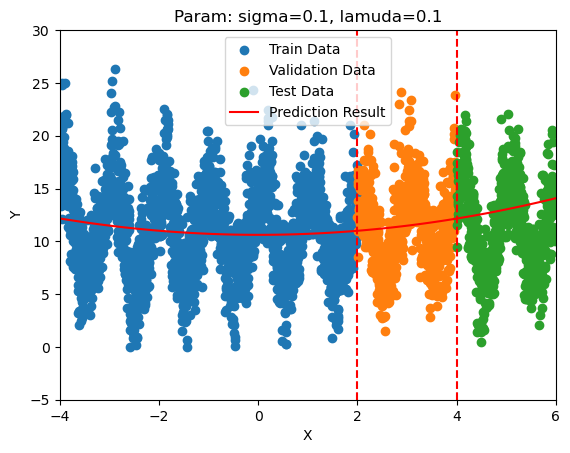

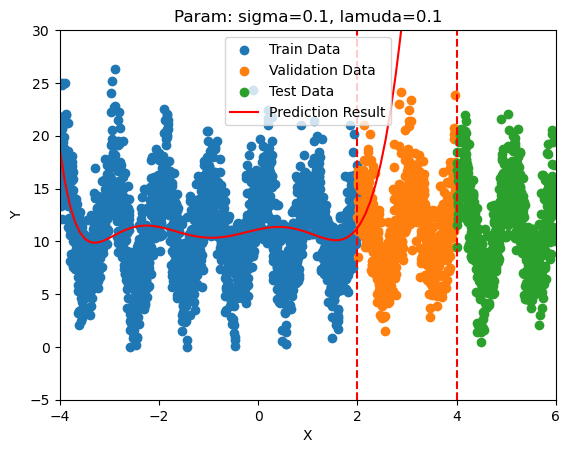

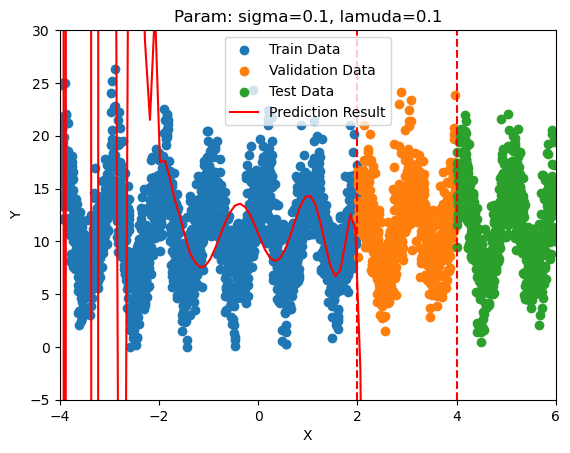

In [22]:
polynomial_ridge_regression = RidgeRegressor(kernel_type=KernelType.polynomial, sigma=1, lamuda=1)
c = [0.5, 0.3, 0.5]
p = [2, 7, 11]
for c_, p_ in zip(c, p):
    polynomial_ridge_regression.set_params(c=c_, p=p_)
    fit = polynomial_ridge_regression.fit()
    x_pred = np.linspace(-4, 6, 100).reshape(-1, 1)
    y_pred = polynomial_ridge_regression.predict(x_pred, fit)
    polynomial_ridge_regression.show_data(x_pred, y_pred)


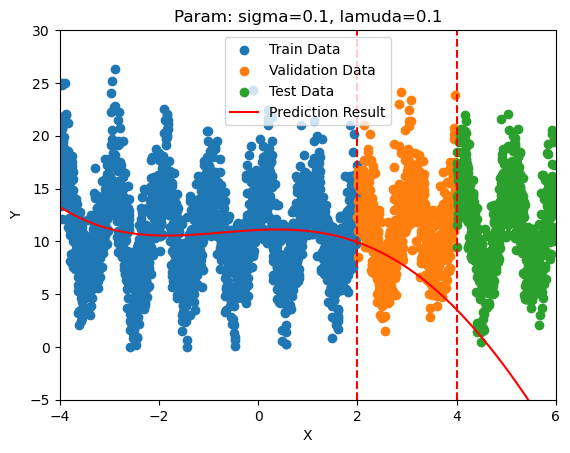

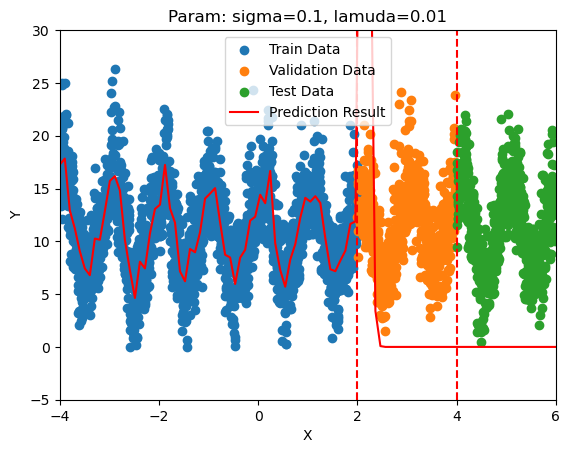

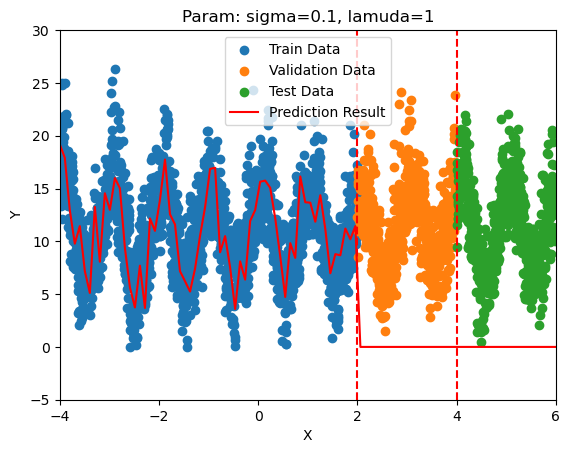

In [23]:
lamuda = [0.1,0.01,1]
l = [10,0.1,0.01]
gaussian_ridge_regression = RidgeRegressor(kernel_type=KernelType.gaussian, sigma=1)
for lamuda_, l_ in zip(lamuda, l):
    gaussian_ridge_regression.set_params(lamuda=lamuda_, l=l_)
    fit = gaussian_ridge_regression.fit()
    x_pred = np.linspace(-4, 6, 100).reshape(-1, 1)
    y_pred = gaussian_ridge_regression.predict(x_pred, fit)
    gaussian_ridge_regression.show_data(x_pred, y_pred)

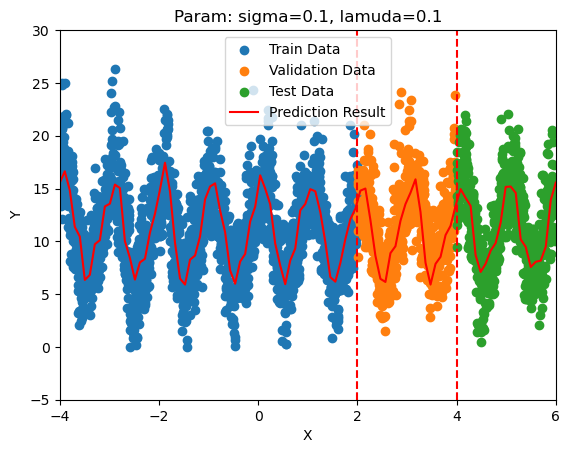

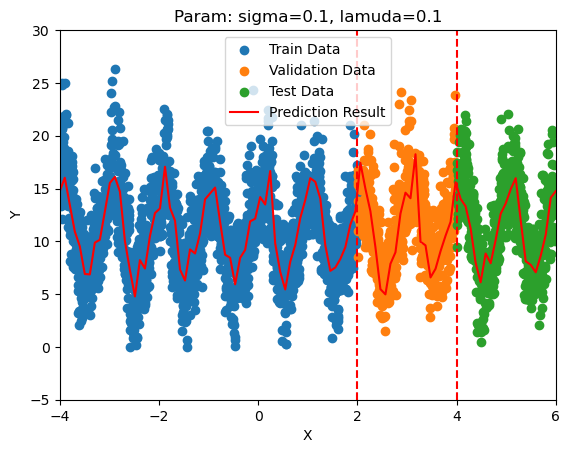

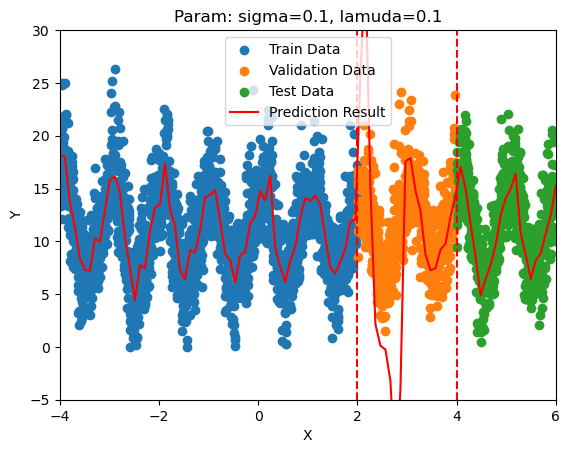

In [24]:
l = [0.05, 0.05, 0.05]
p = [1, 5, 7]
peridic_ridge_regression = RidgeRegressor(KernelType.periodic, lamuda=1, sigma=1)
for l_, p_ in zip(l, p):
    peridic_ridge_regression.set_params(l=l_, p=p_)
    fit = peridic_ridge_regression.fit()
    x_pred = np.linspace(-4, 6, 100).reshape(-1, 1)
    y_pred = peridic_ridge_regression.predict(x_pred, fit)
    peridic_ridge_regression.show_data(x_pred, y_pred)

### 2.3.1 Dual SVM

In [25]:
import numpy as np
import cvxopt
from matplotlib import pyplot as plt

In [26]:
X1 =  np.random.multivariate_normal([-3,-3], [[2,-1],[-1,2]], 80)
y1 =  np.ones(80) * -1
X2 =  np.random.multivariate_normal([3,3], [[2,-1],[-1,2]], 80)
y2 =  np.ones(80)
gaussian_data = np.r_[np.c_[X1, y1], np.c_[X2, y2]]
print(gaussian_data.shape)

(160, 3)


In [27]:
from sklearn.datasets import make_moons
data, label = make_moons(n_samples=160, noise=0.1)
label[label == 0] = -1
label[label == 1] = 1
moon_data = np.c_[data, label]
print(moon_data.shape)

(160, 3)


In [28]:
class DataSet:
    def __init__(self, data):
        self.data = data
        self.x = data[:, :-1]
        self.y = data[:, -1]

    def random_split(self, radio_list):
        np.random.shuffle(self.data)
        indices = radio_list * self.data.shape[0]
        train_data = self.data[:int(indices[0]), :]
        valid_data = self.data[int(indices[0]):int(indices[1]+int(indices[0])), :]
        test_data = self.data[int(indices[0])+int(indices[1]):, :]
        return DataSet(train_data), DataSet(valid_data), DataSet(test_data)

In [29]:
radio_list = np.array([0.5, 0.25, 0.25])

In [30]:
gaussian_dataset = DataSet(gaussian_data)
gaussian_dataset.random_split(radio_list)
gaussian_train_set, gaussian_valid_set, gaussian_test_set = gaussian_dataset.random_split(radio_list)
print(gaussian_train_set.data.shape, gaussian_valid_set.data.shape, gaussian_test_set.data.shape)

(80, 3) (40, 3) (40, 3)


In [31]:
moon_dataset = DataSet(moon_data)
moon_dataset.random_split(radio_list)
moon_train_set, moon_valid_set, moon_test_set = moon_dataset.random_split(radio_list)
print(moon_train_set.data.shape, moon_valid_set.data.shape, moon_test_set.data.shape)

(80, 3) (40, 3) (40, 3)


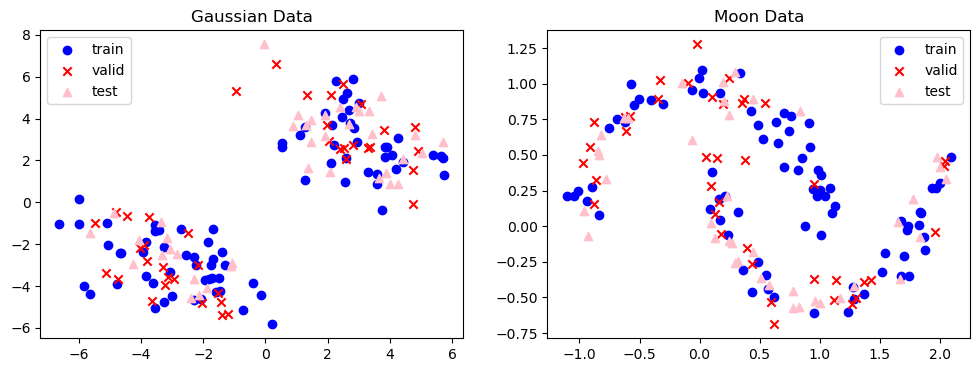

In [32]:
def show_data(data):
    train_set, valid_set, test_set, title = data
    plt.scatter(train_set.x[:, 0], train_set.x[:, 1], c='b', label="train")
    plt.scatter(valid_set.x[:, 0], valid_set.x[:, 1], c='r', label="valid", marker="x")
    plt.scatter(test_set.x[:, 0], test_set.x[:, 1], c='pink', label="test", marker="^")
    plt.title(title)
    plt.legend()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
show_data([gaussian_train_set, gaussian_valid_set, gaussian_test_set, "Gaussian Data"])
plt.subplot(1, 2, 2)
show_data([moon_train_set, moon_valid_set, moon_test_set, "Moon Data"])

In [33]:
cvxopt.solvers.options['show_progress'] = False
class DualSVM:
    def __init__(self, kernel, *kernel_args, **kernel_kwargs) -> None:
        self.kernel = kernel
        self.kernel_args = kernel_args
        self.kernel_kwargs = kernel_kwargs
    
    def fit(self, x, y):
        n_samples = x.shape[0]
        kernel_res = self.kernel(x, x, *self.kernel_args, **self.kernel_kwargs)
        Q = cvxopt.matrix(np.outer(y, y) * kernel_res)
        p = cvxopt.matrix(-np.ones(n_samples))
        G = cvxopt.matrix(-np.eye(n_samples))
        h = cvxopt.matrix(np.zeros(n_samples))
        A = cvxopt.matrix(y.reshape((1, -1)))
        b = cvxopt.matrix(np.zeros(1))

        pq_res = cvxopt.solvers.qp(Q, p, G, h, A, b)
        alphas = np.array(pq_res['x']).reshape(-1)
        alphas_indices = np.where(alphas > 1e-5)[0]

        self.alphas = alphas[alphas_indices]
        self.support_vectors = x[alphas_indices]
        self.support_vector_labels = y[alphas_indices]

    def predict(self, x):
        temp = np.sum(self.alphas.reshape(-1, 1) * self.support_vector_labels.reshape(-1, 1) * self.kernel(self.support_vectors, x, *self.kernel_args), axis=0)
        return np.sign(temp), temp

In [34]:
def linear_kernel(x, y):
    #return np.inner(x, y)
    return np.dot(x, y.T)

def polynomial_kernel(x, y, c=1.0, p=1.0):
    return (np.dot(x, y.T) + c) ** p

def gaussian_kernel(x, y, l=1.0):
    k = np.zeros((x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            k[i, j] = np.exp(-np.sum((x[i] - y[j]) ** 2) / (2 * l ** 2))
    return k

def periodic_kernel(x, y, l=1.0, p=1.0):
    n_x = x.shape[0]
    n_y = y.shape[0]
    res = np.zeros((n_x, n_y))
    for i in range(n_x):
        for j in range(n_y):
            res[i, j] = np.exp(-np.sum(np.sin(np.pi * (x[i] - y[j]) / p) ** 2) / (2 * l ** 2))
    return res

def RBF_kernel(x, y, alpha=1.0, gamma=1.0):
    n_x = x.shape[0]
    n_y = y.shape[0]
    res = np.zeros((n_x, n_y))
    for i in range(n_x):
        for j in range(n_y):
            res[i, j] = alpha * np.exp(-gamma * np.sum((x[i] - y[j]) ** 2))
    return res

In [35]:
def show(svm_gaussian, svm_moon, gaussian_dataset, moon_dataset):
    gaussian_train_set, gaussian_test_set, _ = gaussian_dataset
    moon_train_set, moon_test_set, _ = moon_dataset

    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"Gaussian Data\n{svm_gaussian.kernel.__name__}")
    x = np.linspace(gaussian_train_set.x[:, 0].min()-1, gaussian_train_set.x[:, 0].max()+1, 100)
    y = np.linspace(gaussian_train_set.x[:, 1].min()-1, gaussian_train_set.x[:, 1].max()+1, 100)
    x, y = np.meshgrid(x, y)
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            _, z[i, j] = svm_gaussian.predict(np.array([[x[i, j], y[i, j]]]))
    plt.colorbar(plt.imshow(z, cmap="coolwarm", extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", alpha=0.5, vmin=-1, vmax=1))
    plt.clabel(plt.contour(x, y, z, levels=[-1, -0.5, 0, 0.5, 1], colors=["r", "pink", "black", "lightblue", "b"], linestyles=["--", "--", "-", "--", "--"]), inline=True, fontsize=10)
    mask_pos = gaussian_train_set.y == 1
    mask_neg = gaussian_train_set.y == -1
    plt.scatter(gaussian_train_set.x[mask_pos, 0], gaussian_train_set.x[mask_pos, 1], cmap="coolwarm", c="r", label="Train Set Class 1")
    plt.scatter(gaussian_train_set.x[mask_neg, 0], gaussian_train_set.x[mask_neg, 1], cmap="coolwarm", c="b", label="Train Set Class -1")
    mask_pos = gaussian_test_set.y == 1
    mask_neg = gaussian_test_set.y == -1
    plt.scatter(gaussian_test_set.x[mask_pos, 0], gaussian_test_set.x[mask_pos, 1], cmap="coolwarm", c="yellow", label="Test Set Class 1")
    plt.scatter(gaussian_test_set.x[mask_neg, 0], gaussian_test_set.x[mask_neg, 1], cmap="coolwarm", c="pink", label="Test Set Class -1")
    plt.scatter(svm_gaussian.support_vectors[:, 0], svm_gaussian.support_vectors[:, 1], facecolors='none', edgecolors='r', s=150, label="Support Vector")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f"Moon Data\n{svm_moon.kernel.__name__}")
    x = np.linspace(moon_train_set.x[:, 0].min()-1, moon_train_set.x[:, 0].max()+1, 100)
    y = np.linspace(moon_train_set.x[:, 1].min()-1, moon_train_set.x[:, 1].max()+1, 100)
    x, y = np.meshgrid(x, y)
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            _, z[i, j] = svm_moon.predict(np.array([[x[i, j], y[i, j]]]))
    plt.colorbar(plt.imshow(z, cmap="coolwarm", extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", alpha=0.5, vmin=-1, vmax=1))
    plt.clabel(plt.contour(x, y, z, levels=[-1, -0.5, 0, 0.5, 1], colors=["r", "pink", "black", "lightblue", "b"], linestyles=["--", "--", "-", "--", "--"]), inline=True, fontsize=10)
    mask_pos = moon_train_set.y == 1
    mask_neg = moon_train_set.y == -1
    plt.scatter(moon_train_set.x[mask_pos, 0], moon_train_set.x[mask_pos, 1], cmap="coolwarm", c="r", label="Train Set Class 1")
    plt.scatter(moon_train_set.x[mask_neg, 0], moon_train_set.x[mask_neg, 1], cmap="coolwarm", c="b", label="Train Set Class -1")
    mask_pos = moon_test_set.y == 1
    mask_neg = moon_test_set.y == -1
    plt.scatter(moon_test_set.x[mask_pos, 0], moon_test_set.x[mask_pos, 1], cmap="coolwarm", c="yellow", label="Test Set Class 1")
    plt.scatter(moon_test_set.x[mask_neg, 0], moon_test_set.x[mask_neg, 1], cmap="coolwarm", c="pink", label="Test Set Class -1")
    plt.scatter(svm_moon.support_vectors[:, 0], svm_moon.support_vectors[:, 1], facecolors='none', edgecolors='r', s=150, label="Support Vector")
    plt.legend()
    plt.show()

/tmp/ipykernel_198071/1175758546.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gaussian_train_set.x[mask_pos, 0], gaussian_train_set.x[mask_pos, 1], cmap="coolwarm", c="r", label="Train Set Class 1")
/tmp/ipykernel_198071/1175758546.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gaussian_train_set.x[mask_neg, 0], gaussian_train_set.x[mask_neg, 1], cmap="coolwarm", c="b", label="Train Set Class -1")
/tmp/ipykernel_198071/1175758546.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gaussian_test_set.x[mask_pos, 0], gaussian_test_set.x[mask_pos, 1], cmap="coolwarm", c="yellow", label="Test Set Class 1")
/tmp/ipykernel_198071/1175758546.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gaussian_test_set.x[mask_neg, 0], gaussian_test_set.x[mask

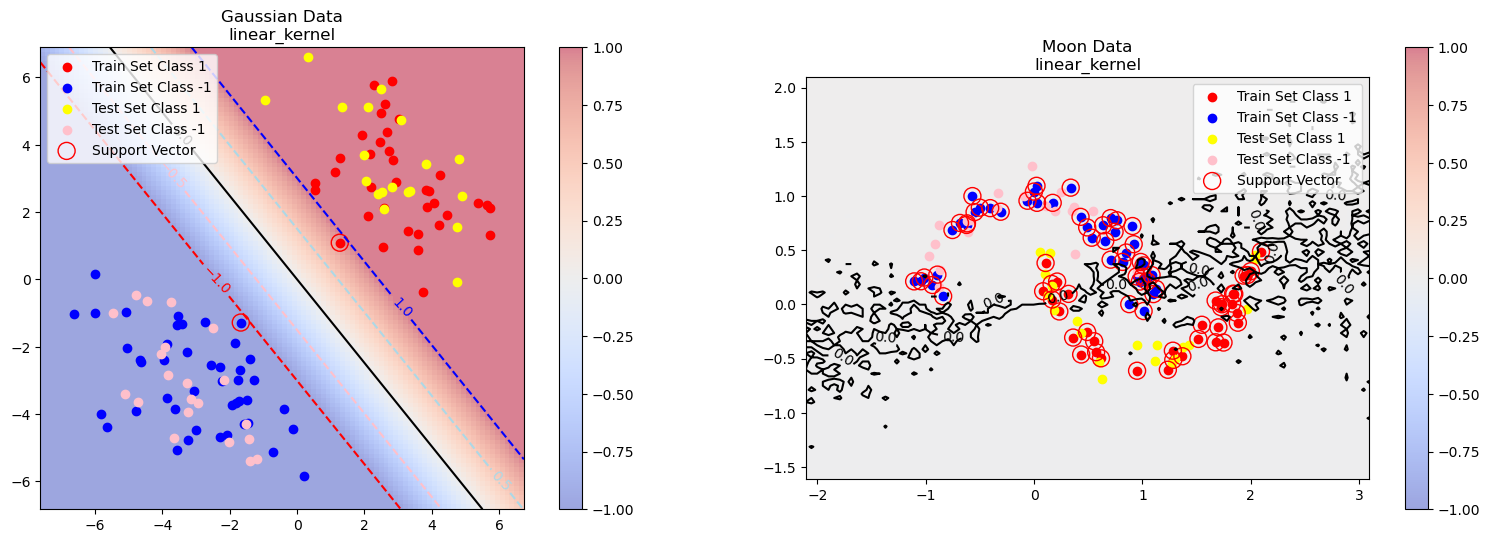

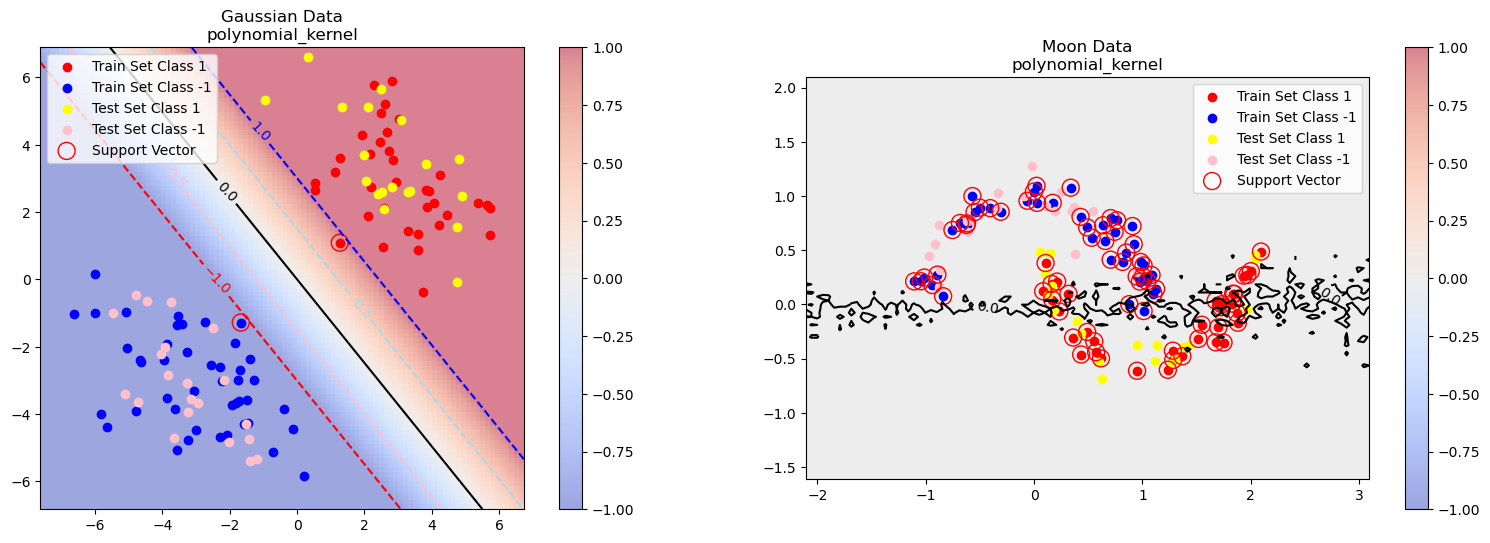

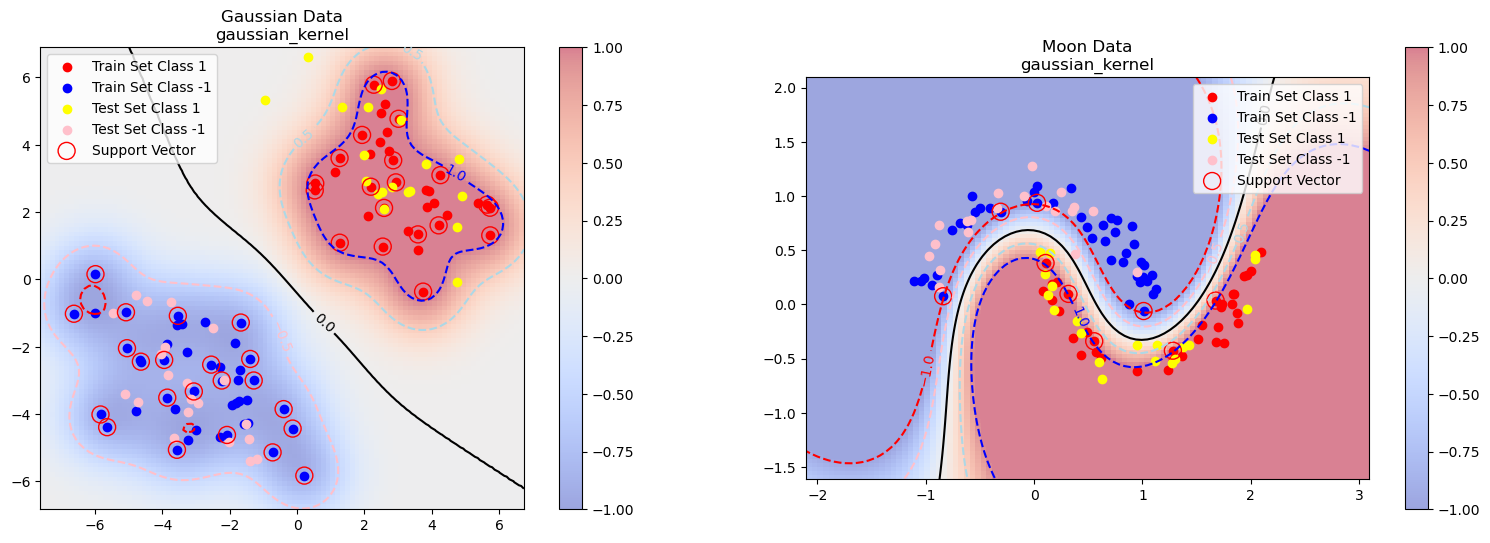

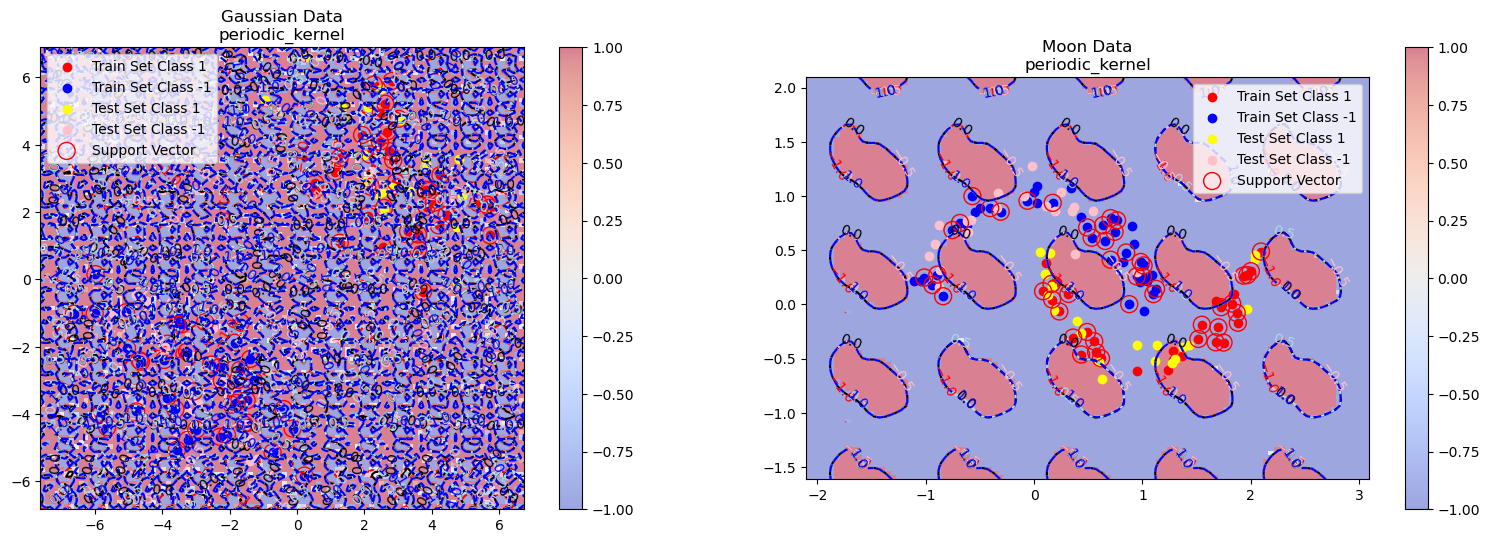

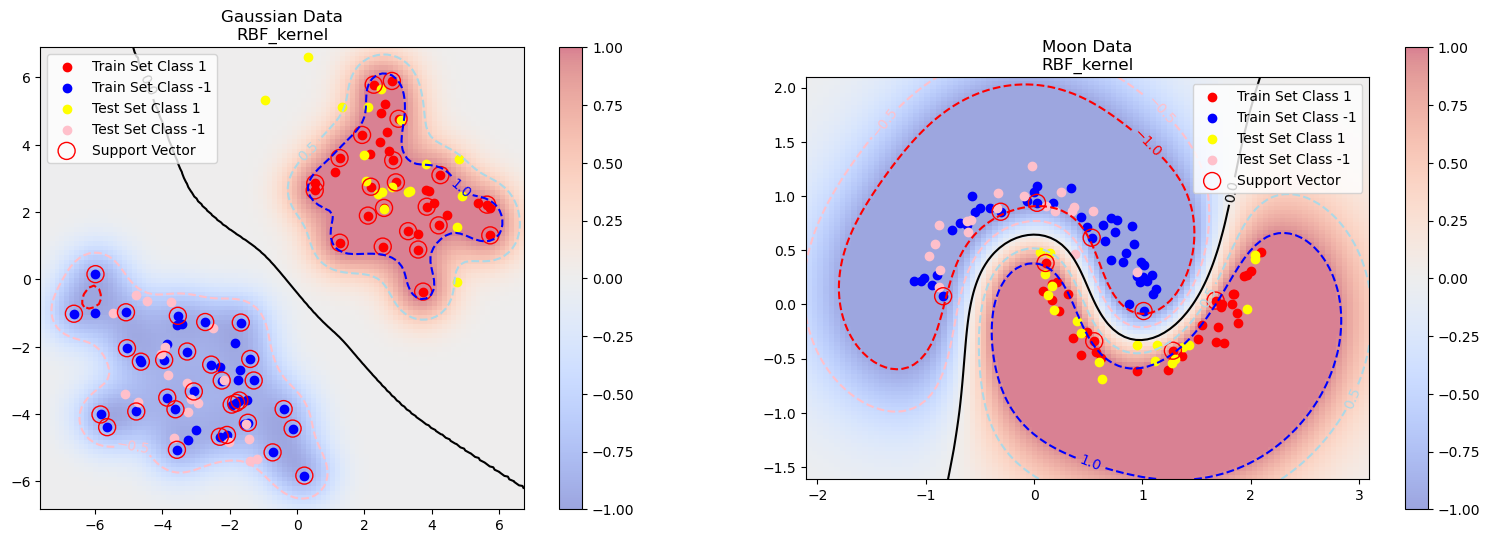

In [36]:
gaussian_dataset = [gaussian_train_set, gaussian_valid_set, gaussian_test_set]
moon_dataset = [moon_train_set, moon_valid_set, moon_test_set]

kernel_list = [linear_kernel, polynomial_kernel, gaussian_kernel, periodic_kernel, RBF_kernel]
for kernel in kernel_list:
    svm_gaussian = DualSVM(kernel)
    svm_gaussian.fit(gaussian_train_set.x, gaussian_train_set.y)
    svm_moon = DualSVM(kernel)
    svm_moon.fit(moon_train_set.x, moon_train_set.y)
    show(svm_gaussian, svm_moon, gaussian_dataset, moon_dataset)